In [1]:
import pandas as pd
import numpy as np

In [51]:
# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

In [52]:
# we have a cleaned dataset here from NaN values
df = pd.read_csv("loan_data.csv")

In [53]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [55]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 0, 'FICO')

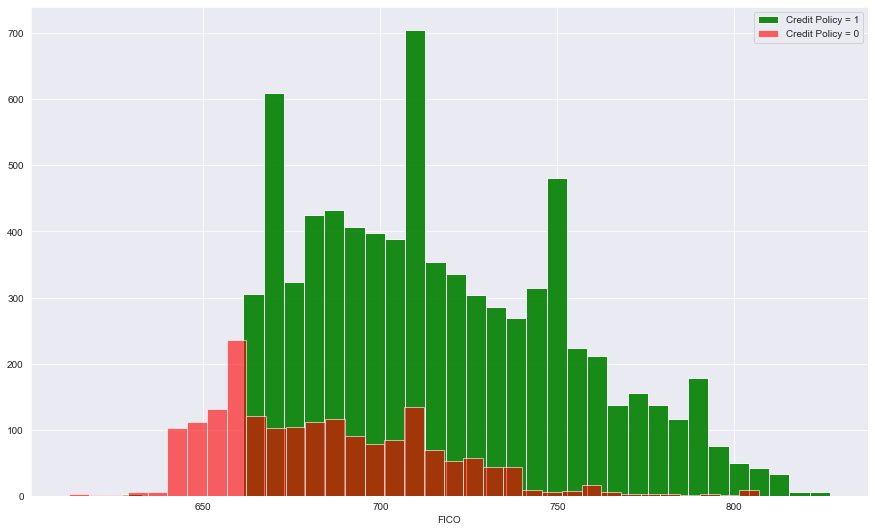

In [56]:
# Looking at the FICO distribution in the data with respect to the Credit Policy.
plt.figure(figsize=(15,9))
df[df['credit.policy']==1]['fico'].hist(bins=35, color='green', label = 'Credit Policy = 1', alpha= 0.9)
df[df['credit.policy']==0]['fico'].hist(bins=35, color='red', label='Credit Policy = 0', alpha = 0.6)
plt.legend()
plt.xlabel('FICO')

In [57]:
# its noticeable that anyone with a FICO score of less than 660-670, 
# will automaticallly not meet the credit under-writing criteria of Lendingclub.com
# Now to check the same for 'not fully paid' category

Text(0.5, 0, 'FICO')

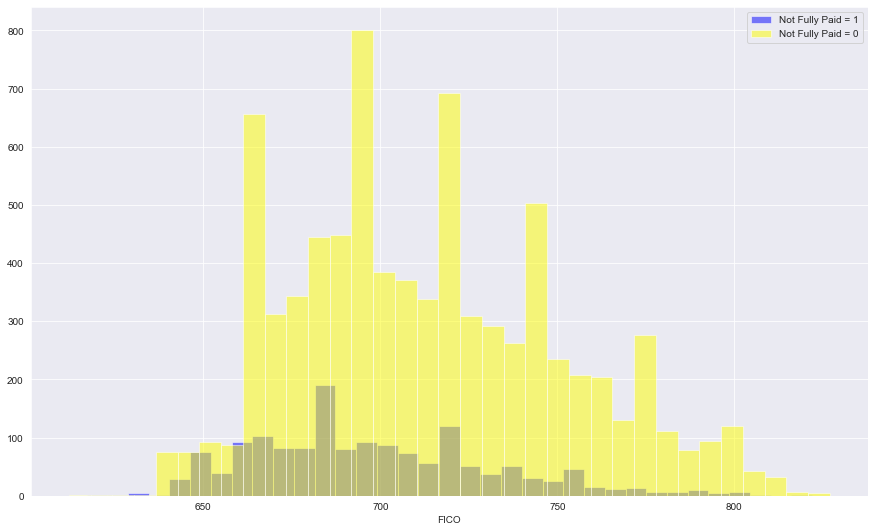

In [58]:
plt.figure(figsize=(15,9))
df[df['not.fully.paid']==1]['fico'].hist(bins=35, color='blue', label = 'Not Fully Paid = 1',alpha = 0.5)
df[df['not.fully.paid']==0]['fico'].hist(bins=35, color='yellow', label = 'Not Fully Paid = 0',alpha=0.5)
plt.legend()
plt.xlabel('FICO')

In [59]:
# We see maority of people do pay off their credit. Not similar sharp cutoff as compared to the comparison before. 
# And the visible spikes are an eventuality of the variety of the FICO Scores
###########################################33
# Next we look at the purpose of loans and not fully paid relationship; using seaborn

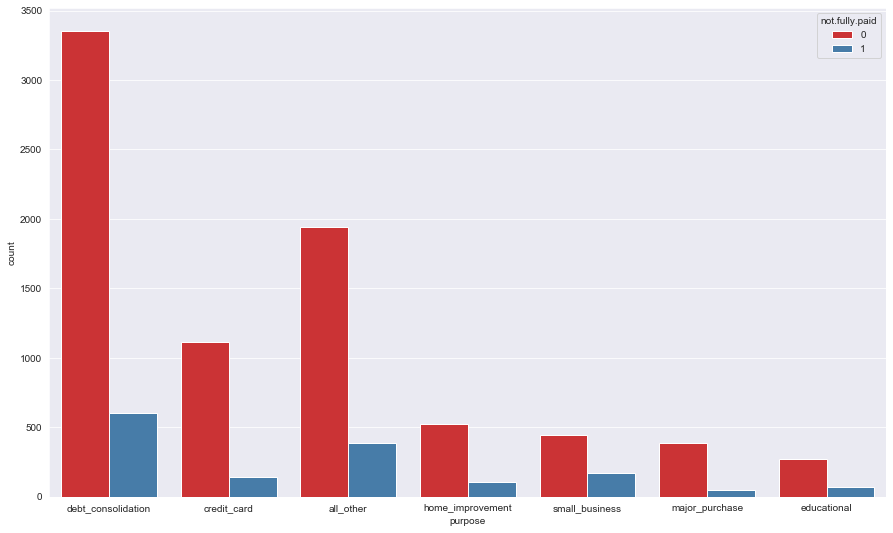

In [60]:
plt.figure(figsize = (15,9))
sns.countplot(x = 'purpose', hue='not.fully.paid', data = df, palette='Set1')

In [61]:
# Education is the least popular reason while debt consolidation stands first.
#The ratio look pretty similar among all the purposes of the paid and not paid.


In [62]:
# A jointplot between FICO score and interest rate to gain further insight... coz, why not ..? :O

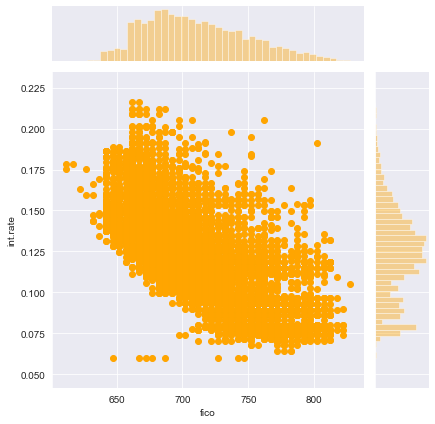

In [63]:
# plt.figure(figsize=(15,9))
sns.jointplot(x='fico', y = 'int.rate', data = df, color= 'orange')

In [64]:
# so far only the obvious. As the FICO score increases, the interest rate decreases as those guys have better credit score.

In [65]:
#Using lmplot to see if the trend differed between the not fully paid and credit policy

<Figure size 792x504 with 0 Axes>

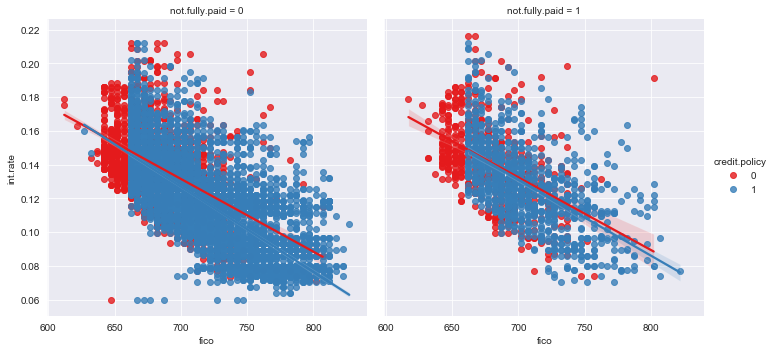

In [72]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate', x='fico', data= df, hue='credit.policy',palette='Set1',col='not.fully.paid')

In [73]:
# the columns represent the not fully paid and the coloring shows the credit policy. 
# Both plots exhibit similarities whether or not it was paid or not OR it was paid fully or not

In [74]:
#####################################
# now before proceeding the data is messy and not strictly numeric values only
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [75]:
# The purpose coluumn is category-based.
#And its time to make the data usable by transforming some of the columns to integer-like data. AKA Dummy variables.

In [76]:
category_features = ['purpose']

In [77]:
final_data = pd.get_dummies(df, columns = category_features,drop_first=True)

In [78]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [79]:
#Now going ahead with training.
from sklearn.model_selection import train_test_split

In [106]:
X = final_data.drop('not.fully.paid', axis =1 )
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
# Now importing DecisionTreeClassifier

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
dtree = DecisionTreeClassifier()

In [110]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [111]:
predictions = dtree.predict(X_test)

In [112]:
from sklearn.metrics import classification_report, confusion_matrix

In [113]:
print('RESULTS OF THE DECISION TREE ON THE DATASET\n')
print(classification_report(y_true=y_test, y_pred=predictions))
print('-------------------------------------------------------\n\n')
print(confusion_matrix(y_test, predictions))

RESULTS OF THE DECISION TREE ON THE DATASET

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2408
           1       0.19      0.20      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.73      2874

-------------------------------------------------------


[[2008  400]
 [ 371   95]]


In [114]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 450)

In [115]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
predictions = rfc.predict(X_test)

In [117]:
print('RESULTS OF THE RANDOM FORESTS ON THE DATASET\n')
print(classification_report(y_true=y_test, y_pred=predictions))
print('-------------------------------------------------------\n\n')
print(confusion_matrix(y_test, predictions))

RESULTS OF THE RANDOM FORESTS ON THE DATASET

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.43      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874

-------------------------------------------------------


[[2396   12]
 [ 457    9]]


In [118]:
# class 1 of Random Forests didn't do better in recall and f1-score compared to decision tree.
# whereas the precision of random forests is better for even class 1 compared to that of decision tree.
# So, it is totally up to occasion and the needs of what is to be done on deciding what type of classifier is needed.